### Import libraries, numpy, pandas, etc.

In [173]:
import urllib.request
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns

### Read the mushroom data

In [174]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', 
                 header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Create a pandas DataFrame with a subset of columns in the dataset. There are three columns that indicate: whether the mushrooms are edible or poisonous, their odor, and their population.

In [175]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', 
                            sep=',', 
                            header=None, 
                            usecols=[0,5,21], 
                            names=['Edible/Poisonous','Odor','Population'])
df.head(20)

,Edible/Poisonous,Odor,Population
0,p,p,s
1,e,a,n
2,e,l,n
3,p,p,s
4,e,n,a
5,e,a,n
6,e,a,n
7,e,l,s
8,p,p,v
9,e,a,s


### Replace the codes used in the data with numeric values

In [176]:
df['Edible/Poisonous'].replace({'e':0, 'p': 1}, inplace=True)
df['Odor'].replace({'a':2, 'l':3, 'c':4, 'y':5, 'f':6, 'm':7, 'n':8, 'p':9, 's':10}, inplace=True)
df['Population'].replace({'a':11, 'c':12, 'n':13, 's':14, 'v':15, 'y':16}, inplace=True)

df

,Edible/Poisonous,Odor,Population
0,1,9,14
1,0,2,13
2,0,3,13
3,1,9,14
4,0,8,11
...,...,...,...
8119,0,8,12
8120,0,8,15
8121,0,8,12
8122,1,5,15


### This graph shows the data in the "Edible/Poisonous" column. This data shows that there are more edible mushrooms than poisonous.

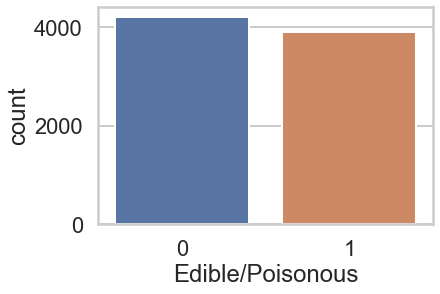

In [185]:
sns.countplot(x = 'Edible/Poisonous', data = df)

### This graph shows the data in the "Odor" column.

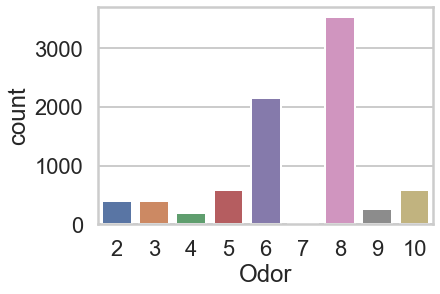

In [166]:
sns.countplot(x = 'Odor', data = df)

### This graph shows the data in the "Population" column.

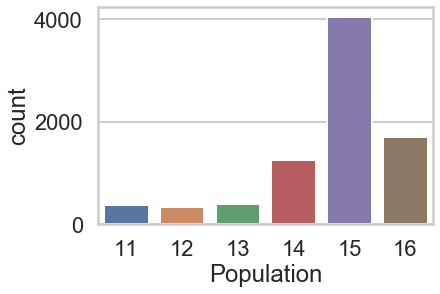

In [167]:
sns.countplot(x = 'Population', data = df)

### This scatterplot shows the distribution of data between Edible/Poisonous mushrooms vs. odor vs. population

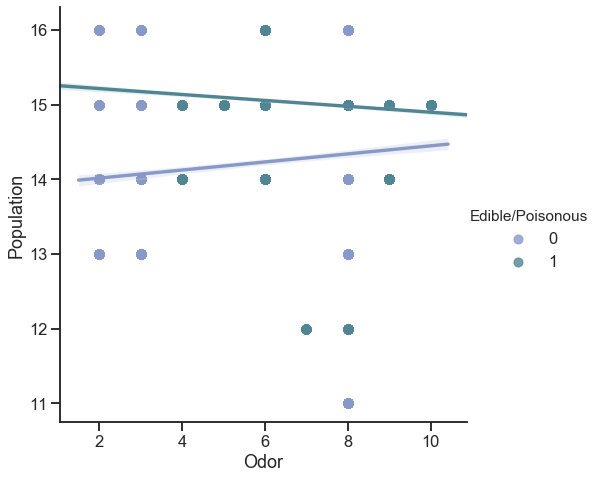

In [195]:
sns.set(style="ticks", context="talk")
pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)
g = sns.lmplot(x='Odor', y='Population', hue='Edible/Poisonous', data=df, palette=pal, height=7)
g.set_axis_labels('Odor', 'Population')
plt.show()